# Exercise 1: Comparing Network Architectures with the Boston Housing Dataset

In this exercise, you'll implement and compare three different neural network architectures using the Boston Housing dataset:
1. A basic sequential network
2. A wide & deep network
3. A wide & deep network with auxiliary output

The goal is to understand how different architectures affect model performance and training dynamics.

## Setup

First, let's import our dependencies and prepare our data:


In [2]:
!pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
(X_full, y_full), _ = tf.keras.datasets.boston_housing.load_data()

# Split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

# Scale the inputs
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Function to plot training history
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.xlabel("Epoch")
    plt.show()


2024-11-06 16:45:06.540189: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 16:45:06.543921: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 16:45:06.553242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730911506.567690   29641 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730911506.572009   29641 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 16:45:06.588302: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins



## Part 1: Sequential Model

Implement a basic sequential model with three dense layers. Use ReLU activation for hidden layers.


Epoch 1/20


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2024-11-06 16:45:12.917540: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - RootMeanSquaredError: 26.0045 - loss: 676.3527 - val_RootMeanSquaredError: 25.3140 - val_loss: 640.7995
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 24.9412 - loss: 622.2031 - val_RootMeanSquaredError: 24.6134 - val_loss: 605.8214
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 24.7630 - loss: 614.0312 - val_RootMeanSquaredError: 23.8920 - val_loss: 570.8268
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 24.0455 - loss: 578.5791 - val_RootMeanSquaredError: 23.1069 - val_loss: 533.9296
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - RootMeanSquaredError: 23.2635 - loss: 541.8948 - val_RootMeanSquaredError: 22.2420 - val_loss: 494.7062
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 22.4504 - loss: 504.2087 - val_RootMeanSquaredError: 21.2805 - val_loss: 452.8593
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 20.9967 - loss

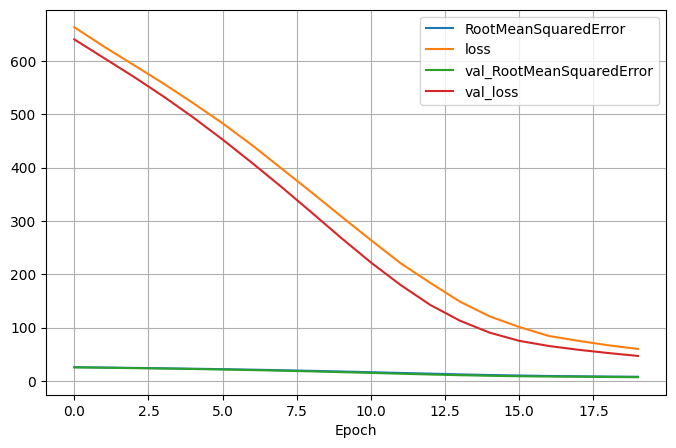

In [4]:

def create_sequential_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(13,)),  # Input layer with 13 features
        tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal"),  # First hidden layer
        tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal"),  # Second hidden layer
        tf.keras.layers.Dense(1)                                    # Output layer (no activation for regression)
    ])
    return model

# Training
model_sequential = create_sequential_model()
model_sequential.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])
history_sequential = model_sequential.fit(
    X_train_scaled, y_train, 
    epochs=20,
    validation_data=(X_valid_scaled, y_valid))

plot_learning_curves(history_sequential)



## Part 2: Wide & Deep Model

Create a wide & deep model using the Functional API. Split the input features into two groups:
- Wide path: Features 0-5 (size-related features)
- Deep path: Features 6-12 (location and age-related features)


Epoch 1/20


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_4', 'keras_tensor_6']. Received: the structure of inputs=('*', '*')
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - RootMeanSquaredError: 24.3846 - loss: 594.7899 - val_RootMeanSquaredError: 23.5674 - val_loss: 555.4231
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - RootMeanSquaredError: 23.0922 - loss: 533.8295 - val_RootMeanSquaredError: 22.8446 - val_loss: 521.8769
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - RootMeanSquaredError: 22.8528 - loss: 522.6405 - val_RootMeanSquaredError: 22.0325 - val_loss: 485.4313
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 22.0543 - loss: 486.6049 - val_RootMeanSquaredError: 21.1194 - val_loss: 446.0304
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - RootMeanSquaredError: 21.5934 - loss: 466.6680 - val_RootMeanSquaredError: 20.0533 - val_loss: 402.1340
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - RootMeanSquaredError: 20.7172 - loss: 429.9738 - val_RootMeanSquaredError: 18.8499 - val_loss: 355.3188
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - RootMeanSquaredError: 18.9743 - loss

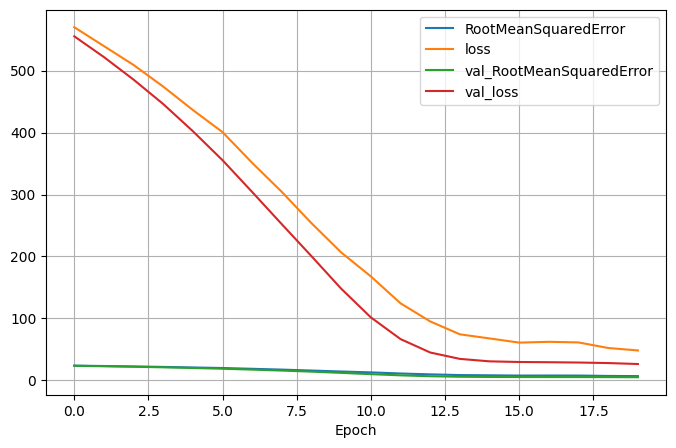

In [5]:

def create_wide_and_deep_model():
    # Wide path
    input_wide = tf.keras.layers.Input(shape=(13,))
    wide_normalized = tf.keras.layers.BatchNormalization()(input_wide) # Normalize the wide path input

    # Deep path
    input_deep = tf.keras.layers.Input(shape=(13,))
    deep_normalized = tf.keras.layers.BatchNormalization()(input_deep) # Normalize the deep path input
    hidden1 = tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal")(deep_normalized)
    hidden2 = tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal")(hidden1)

    # Concatenate the outputs of wide and deep paths
    concatenated = tf.keras.layers.concatenate([wide_normalized, hidden2])

    # Output layer
    output = tf.keras.layers.Dense(1)(concatenated)

    # Model creation
    model = tf.keras.models.Model(inputs=[input_wide, input_deep], outputs=output)
    return model

# Training
model_wide_deep = create_wide_and_deep_model()
model_wide_deep.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])

# TODO: Prepare the wide and deep inputs
X_train_wide, X_train_deep = X_train_scaled, X_train_scaled
X_valid_wide, X_valid_deep = X_valid_scaled, X_valid_scaled
X_test_wide, X_test_deep = X_test_scaled, X_test_scaled

history_wide_deep = model_wide_deep.fit(
    [X_train_wide, X_train_deep], y_train,
    epochs=20,
    validation_data=([X_valid_wide, X_valid_deep], y_valid))

plot_learning_curves(history_wide_deep)




## Part 3: Wide & Deep Model with Auxiliary Output

Enhance the wide & deep model by adding an auxiliary output from the deep path.


Epoch 1/20


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_12', 'keras_tensor_14']. Received: the structure of inputs=('*', '*')
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - aux_output_RootMeanSquaredError: 24.5054 - aux_output_loss: 62.5888 - dense_8_RootMeanSquaredError: 24.2107 - dense_8_loss: 548.1835 - loss: 587.6563 - val_aux_output_RootMeanSquaredError: 25.2454 - val_aux_output_loss: 60.7370 - val_dense_8_RootMeanSquaredError: 23.9353 - val_dense_8_loss: 494.0971 - val_loss: 579.3417
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - aux_output_RootMeanSquaredError: 24.1600 - aux_output_loss: 57.9882 - dense_8_RootMeanSquaredError: 23.0549 - dense_8_loss: 475.6212 - loss: 537.5167 - val_aux_output_RootMeanSquaredError: 25.3748 - val_aux_output_loss: 61.3986 - val_dense_8_RootMeanSquaredError: 23.3147 - val_dense_8_loss: 469.9856 - val_loss: 553.6039
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - aux_output_RootMeanSquaredError: 25.3079 - aux_output_loss: 63.0022 - dense_8_RootMeanSquaredError: 23.5096 - dense_8_loss: 489.2296 - loss: 561.5973 - val_aux_output_RootMeanSquaredError: 25.4615 - val_aux_output_lo

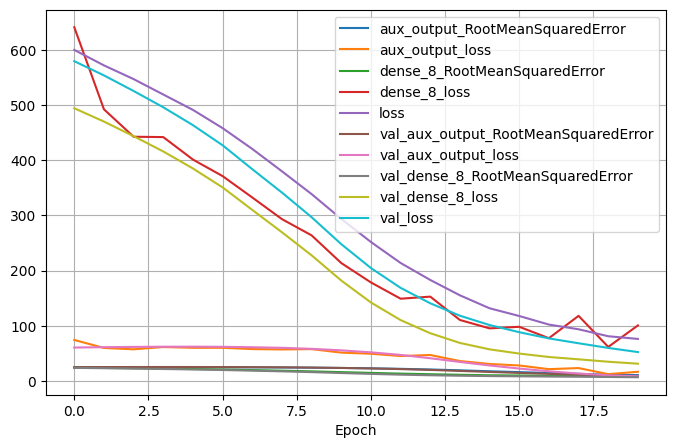

In [6]:

def create_wide_and_deep_aux_model():
    # Wide path
    input_wide = tf.keras.layers.Input(shape=(13,))
    wide_normalized = tf.keras.layers.BatchNormalization()(input_wide)  # Normalize the wide path input

    # Deep path
    input_deep = tf.keras.layers.Input(shape=(13,))
    deep_normalized = tf.keras.layers.BatchNormalization()(input_deep)  # Normalize the deep path input
    hidden1 = tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal")(deep_normalized)
    hidden2 = tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal")(hidden1)

    # Auxiliary output (from the second hidden layer of the deep path)
    auxiliary_output = tf.keras.layers.Dense(1, name="aux_output")(hidden2)

    # Concatenate the outputs of the wide and deep paths
    concatenated = tf.keras.layers.concatenate([wide_normalized, hidden2])

    # Main output layer
    main_output = tf.keras.layers.Dense(1)(concatenated)

    # Model creation with two outputs
    model = tf.keras.models.Model(inputs=[input_wide, input_deep], outputs=[main_output, auxiliary_output])

    return model

# Training
model_wide_deep_aux = create_wide_and_deep_aux_model()
model_wide_deep_aux.compile(
    loss=["mse", "mse"],
    loss_weights=[0.9, 0.1],
    optimizer="adam",
    metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

history_wide_deep_aux = model_wide_deep_aux.fit(
    [X_train_wide, X_train_deep], [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_wide, X_valid_deep], [y_valid, y_valid]))

plot_learning_curves(history_wide_deep_aux)


## Part 4: Analysis

1. Compare the training curves for all three models. Which architecture learns fastest?
2. Calculate and compare the test set performance for each model.
3. What are the advantages and disadvantages of each architecture based on your results?


In [ ]:


# TODO: Evaluate each model on the test set and compare results


# Example comparison table structure:
results = {
    'Model': ['Sequential', 'Wide & Deep', 'Wide & Deep with Aux'],
    'Test RMSE': [0, 0, 0],  # Fill with your results
    'Training Time': [0, 0, 0]  # Fill with your results
}
pd.DataFrame(results)



In [7]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Function to evaluate a model and return RMSE and training time
def evaluate_model(model, X_test_wide, X_test_deep, y_test):
    start_time = time.time()  # Start timer
    
    # If the model has multiple outputs (Wide & Deep with Aux model)
    if isinstance(model.output, list):  # Check if model has auxiliary output
        y_pred, _ = model.predict([X_test_wide, X_test_deep])  # Get main prediction (ignoring auxiliary)
    else:
        y_pred = model.predict([X_test_wide, X_test_deep])  # Single output models
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Measure training time
    training_time = time.time() - start_time
    
    return rmse, training_time

# Evaluate Sequential Model
start_time_sequential = time.time()
rmse_sequential = model_sequential.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Get RMSE from evaluation
time_sequential = time.time() - start_time_sequential

# Evaluate Wide & Deep Model
start_time_wide_deep = time.time()
rmse_wide_deep = model_wide_deep.evaluate([X_test_wide, X_test_deep], y_test, verbose=0)[1]  # Get RMSE
time_wide_deep = time.time() - start_time_wide_deep

# Evaluate Wide & Deep with Auxiliary Model
start_time_wide_deep_aux = time.time()
rmse_wide_deep_aux = model_wide_deep_aux.evaluate([X_test_wide, X_test_deep], [y_test, y_test], verbose=0)[1]  # Get RMSE
time_wide_deep_aux = time.time() - start_time_wide_deep_aux

# Create comparison table with results
results = {
    'Model': ['Sequential', 'Wide & Deep', 'Wide & Deep with Aux'],
    'Test RMSE': [rmse_sequential, rmse_wide_deep, rmse_wide_deep_aux],
    'Training Time (seconds)': [time_sequential, time_wide_deep, time_wide_deep_aux]
}

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)


                  Model  Test RMSE  Training Time (seconds)
0            Sequential   6.504048                 0.067202
1           Wide & Deep   6.331578                 0.081527
2  Wide & Deep with Aux  42.038654                 0.066226



## Bonus Challenge

Modify the wide & deep architecture to include dropout layers and experiment with different learning rates. Does this improve performance?

# Exercise 2: Custom Activation Functions and Their Impact

In this exercise, you'll implement custom activation functions and compare their performance with standard activations. You'll use the Wine Quality dataset, which is small but provides an interesting regression problem.

## Setup


In [8]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# Load Wine Quality dataset
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
X = wine_data.drop('quality', axis=1).values
y = wine_data['quality'].values

# Split and scale the data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Utility function for plotting
def plot_activation_functions(activation_functions, x_range=(-5, 5)):
    x = np.linspace(x_range[0], x_range[1], 200)
    plt.figure(figsize=(12, 4))
    
    for name, fn in activation_functions.items():
        y = fn(x)
        plt.plot(x, y, label=name)
    
    plt.grid(True)
    plt.legend()
    plt.title("Activation Functions")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()



## Part 1: Implementing Custom Activation Functions

Implement the following custom activation functions:

1. Mish: f(x) = x * tanh(softplus(x))
2. Swish: f(x) = x * sigmoid(x)
3. A custom variant of your choice (be creative!)


Test outputs:
Mish: [-0.25250146 -0.30340144  0.          0.86509836  1.943959  ]
Swish: [-0.23840584 -0.26894143  0.          0.7310586   1.7615942 ]
Custom Variant: [-0.55214506 -0.31830025  0.          0.68169975  1.4478549 ]


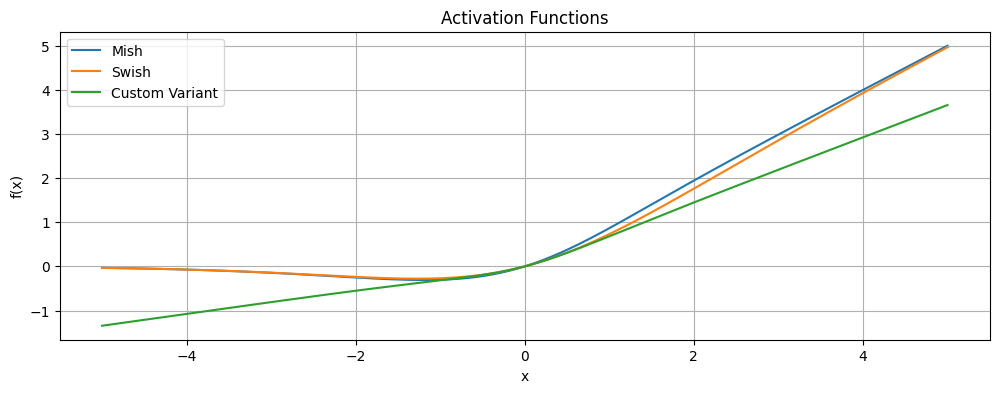

In [12]:

def custom_mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

def custom_swish(x):
    return x * tf.math.sigmoid(x)

def custom_variant(x):
    return x * tf.math.sigmoid(tf.math.tanh(x))

# Test your implementations
activation_functions = {
    "Mish": custom_mish,
    "Swish": custom_swish,
    "Custom Variant": custom_variant
}

# Create test input
test_input = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])
print("Test outputs:")
for name, fn in activation_functions.items():
    print(f"{name}: {fn(test_input).numpy()}")

# Plot the activation functions
plot_activation_functions(activation_functions)




## Part 2: Creating Models with Custom Activations

Create a function that builds a model using a given activation function:



In [ ]:

def create_model(activation_fn, input_shape=[11]):
    # TODO: Implement a model with:
    # - 3 Dense layers (64, 32, 1 neurons)
    # - Custom activation for hidden layers
    # - No activation for output layer
    # - He initialization for weights
    return None

# Create models with different activations
activations_to_test = {
    "ReLU": tf.nn.relu,
    "Mish": custom_mish,
    "Swish": custom_swish,
    "Custom": custom_variant
}

models = {name: create_model(fn) for name, fn in activations_to_test.items()}


In [13]:
def create_model(activation_fn, input_shape=[11]):
    # Initialize the model
    model = tf.keras.Sequential()
    
    # Input layer (implicitly defined by the input_shape in the first Dense layer)
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    
    # First hidden layer (64 neurons, custom activation, He initialization)
    model.add(tf.keras.layers.Dense(64, activation=activation_fn, kernel_initializer='he_normal'))
    
    # Second hidden layer (32 neurons, custom activation, He initialization)
    model.add(tf.keras.layers.Dense(32, activation=activation_fn, kernel_initializer='he_normal'))
    
    # Output layer (1 neuron, no activation)
    model.add(tf.keras.layers.Dense(1))  # Linear output for regression
    
    return model

# Create models with different activations
activations_to_test = {
    "ReLU": tf.nn.relu,          # Standard ReLU activation
    "Mish": custom_mish,         # Custom Mish activation
    "Swish": custom_swish,       # Custom Swish activation
    "Custom": custom_variant     # Custom variant activation
}

# Creating a model for each activation function
models = {name: create_model(fn) for name, fn in activations_to_test.items()}

# Printing the models summary to verify
for name, model in models.items():
    print(f"{name} model summary:")
    model.summary()
    print("\n")


ReLU model summary:


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)



Mish model summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)



Swish model summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)



Custom model summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)


## Part 3: Training and Comparison

Train each model and compare their performance:


In [ ]:

def train_and_evaluate(model, name):
    # TODO: Implement training and evaluation
    # - Compile model with appropriate loss and metrics
    # - Train for 20 epochs
    # - Record training time and history
    # - Evaluate on test set
    # Return training time, history, and test score
    return None

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining model with {name} activation:")
    results[name] = train_and_evaluate(model, name)

# TODO: Create a comparison DataFrame with:
# - Training time
# - Final training loss
# - Final validation loss
# - Test score



In [14]:
import time
import tensorflow as tf
import pandas as pd

# Train and evaluate the model
def train_and_evaluate(model, name):
    # Compile model with Mean Squared Error (MSE) for regression, and metrics for performance
    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=['mean_squared_error'])
    
    # Train for 20 epochs and record training time
    start_time = time.time()
    history = model.fit(X_train_scaled, y_train, 
                        validation_data=(X_valid_scaled, y_valid), 
                        epochs=20, 
                        batch_size=32, 
                        verbose=0)  # Set verbose=0 to hide the training output
    
    training_time = time.time() - start_time
    
    # Evaluate on the test set
    test_loss, test_score = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    # Return training time, history, and test score
    return {
        'training_time': training_time,
        'history': history.history,
        'test_score': test_score
    }

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining model with {name} activation:")
    results[name] = train_and_evaluate(model, name)

# Create a comparison DataFrame
comparison_data = {
    "Model": [],
    "Training Time (seconds)": [],
    "Final Training Loss": [],
    "Final Validation Loss": [],
    "Test Score": []
}

# Populate the comparison data
for name, result in results.items():
    comparison_data["Model"].append(name)
    comparison_data["Training Time (seconds)"].append(result['training_time'])
    comparison_data["Final Training Loss"].append(result['history']['loss'][-1])
    comparison_data["Final Validation Loss"].append(result['history']['val_loss'][-1])
    comparison_data["Test Score"].append(result['test_score'])

# Create the comparison DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the comparison
print("\nModel Comparison:")
print(comparison_df)



Training model with ReLU activation:

Training model with Mish activation:

Training model with Swish activation:

Training model with Custom activation:

Model Comparison:
    Model  Training Time (seconds)  Final Training Loss  \
0    ReLU                 4.228416             0.866458   
1    Mish                 2.563396             0.555281   
2   Swish                 2.505514             0.672839   
3  Custom                 2.804208             0.894621   

   Final Validation Loss  Test Score  
0               1.078883    0.901676  
1               0.696382    0.608865  
2               0.729338    0.638083  
3               0.958287    0.922469  



## Part 4: Visualization and Analysis

Create visualizations to compare the performance of different activation functions:


In [ ]:


def plot_training_curves(results):
    # TODO: Create plots comparing:
    # - Training loss over time
    # - Validation loss over time
    # - Training vs validation loss for each activation
    pass

# Create visualizations
plot_training_curves(results)

# TODO: Calculate and display additional metrics like:
# - Training speed (examples/second)
# - Number of parameters
# - Memory usage




## Part 5: Analysis Questions

1. Which activation function performed best in terms of:
   - Final model accuracy?
   - Training speed?
   - Convergence stability?

2. Why do you think your custom activation function performed the way it did?

3. What are the tradeoffs between the different activation functions you tested?

## Bonus Challenge

1. Implement a parametric version of your custom activation function where some aspects of the function can be learned during training.

2. Try using your activation functions with different optimizers (Adam, SGD, RMSprop) and learning rates. Do some activation functions work better with certain optimizers?

# Exercise 3: Batch Normalization Placement and Effects

In this exercise, you'll experiment with different batch normalization strategies and analyze their impact on model training and performance. You'll use the Fashion MNIST dataset but work with a smaller subset to keep computation manageable.

## Setup



In [ ]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Take a subset of the data to keep computation manageable
X_train = X_train_full[:10000] / 255.0
y_train = y_train_full[:10000]
X_valid = X_train_full[10000:12000] / 255.0
y_valid = y_train_full[10000:12000]
X_test = X_test[:2000] / 255.0
y_test = y_test[:2000]

# Reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_valid = X_valid.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Class names for reference
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Utility function for plotting training history
def plot_learning_curves(history, metrics=['loss', 'accuracy']):
    fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
    if len(metrics) == 1:
        axes = [axes]
    
    for ax, metric in zip(axes, metrics):
        ax.plot(history.history[metric], label='Train')
        ax.plot(history.history[f'val_{metric}'], label='Validation')
        ax.set_title(f'Model {metric.capitalize()}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel(metric.capitalize())
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()




## Part 1: Baseline Model Without Batch Normalization

First, create a baseline CNN model without any batch normalization:


In [ ]:

def create_baseline_model():
    # TODO: Create a CNN with:
    # - 2 convolutional layers (32 and 64 filters)
    # - MaxPooling after each conv layer
    # - Dense layer with 128 neurons
    # - Output layer with 10 neurons (softmax)
    # Use ReLU activation for hidden layers
    model = None # Your code here
    return model

# Train baseline model
baseline_model = create_baseline_model()
baseline_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

baseline_history = baseline_model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_valid, y_valid))

plot_learning_curves(baseline_history)




## Part 2: Batch Normalization After Activation

Implement a model with batch normalization layers placed after activation functions:


In [ ]:


def create_bn_after_activation_model():
    # TODO: Create a CNN with the same architecture as baseline, but add
    # batch normalization layers after each ReLU activation
    # Order should be: Conv -> ReLU -> BatchNorm -> MaxPool
    model = None # Your code here
    return model

# Train model
bn_after_model = create_bn_after_activation_model()
bn_after_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

bn_after_history = bn_after_model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_valid, y_valid))

plot_learning_curves(bn_after_history)




## Part 3: Batch Normalization Before Activation

Implement a model with batch normalization layers placed before activation functions:


In [ ]:

def create_bn_before_activation_model():
    # TODO: Create a CNN with the same architecture as baseline, but add
    # batch normalization layers before each ReLU activation
    # Order should be: Conv -> BatchNorm -> ReLU -> MaxPool
    model = None # Your code here
    return model

# Train model
bn_before_model = create_bn_before_activation_model()
bn_before_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

bn_before_history = bn_before_model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_valid, y_valid))

plot_learning_curves(bn_before_history)




## Part 4: Analysis

Compare the performance of all three models:


In [ ]:

def compare_models(histories, names):
    # TODO: Create a performance comparison including:
    # - Final training accuracy
    # - Final validation accuracy
    # - Training time
    # - Number of parameters
    # Return a pandas DataFrame with the results
    return None

# Example usage:
model_histories = {
    'Baseline': baseline_history,
    'BN After Activation': bn_after_history,
    'BN Before Activation': bn_before_history
}

comparison_df = compare_models(model_histories, list(model_histories.keys()))
print(comparison_df)

# TODO: Create visualizations comparing:
# 1. Training curves (accuracy and loss) for all models
# 2. Training time per epoch
# 3. Parameter count comparison




## Part 5: Hyperparameter Sensitivity

Test how each model responds to different learning rates:



In [ ]:

def test_learning_rates(model_fn, learning_rates=[0.1, 0.01, 0.001]):
    results = []
    for lr in learning_rates:
        # TODO: Train the model with different learning rates
        # Record accuracy and stability metrics
        pass
    return results

# Test hyperparameter sensitivity for each model type
# Implement your solution here




## Analysis Questions

1. Which batch normalization placement strategy performed best? Why do you think this is the case?

2. How did the different models respond to changes in learning rate? Which was most stable?

3. What are the tradeoffs between the different approaches in terms of:
   - Training time
   - Model complexity (number of parameters)
   - Final performance
   - Training stability

## Bonus Challenge

1. Implement a version of the model that uses batch normalization with the following modifications:
   - Custom batch normalization momentum
   - Different initialization strategies for batch normalization parameters
   - Experiment with different batch sizes to see how they affect batch normalization's performance

2. Add dropout layers to each model variant and compare how batch normalization interacts with dropout when placed in different positions.

# Exercise 4: Multi-Input Networks for Mixed Data Types

In this exercise, you'll build a network that processes both numerical and categorical data to predict car prices using the Auto MPG dataset. You'll implement different architectures for processing each type of data and combine them effectively.

## Setup


In [ ]:

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Load and prepare the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin', 'Car Name']

# Load the raw data
df = pd.read_csv(url, names=column_names,
                 na_values='?', comment='\t',
                 sep=' ', skipinitialspace=True)

# Clean the data
df = df.dropna()

# Separate features
numeric_features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']
categorical_features = ['Model Year', 'Origin']
target = 'MPG'

# Create inputs
numeric_data = df[numeric_features]
categorical_data = df[categorical_features]
target_data = df[target]

# Split the data
X_num_train_full, X_num_test, X_cat_train_full, X_cat_test, y_train_full, y_test = train_test_split(
    numeric_data, categorical_data, target_data, test_size=0.2, random_state=42)

X_num_train, X_num_valid, X_cat_train, X_cat_valid, y_train, y_valid = train_test_split(
    X_num_train_full, X_cat_train_full, y_train_full, test_size=0.2, random_state=42)

# Scale numeric data
scaler = StandardScaler()
X_num_train_scaled = scaler.fit_transform(X_num_train)
X_num_valid_scaled = scaler.transform(X_num_valid)
X_num_test_scaled = scaler.transform(X_num_test)

# Encode categorical data
encoder = OneHotEncoder(sparse=False)
X_cat_train_encoded = encoder.fit_transform(X_cat_train)
X_cat_valid_encoded = encoder.transform(X_cat_valid)
X_cat_test_encoded = encoder.transform(X_cat_test)

# Utility function for plotting training history
def plot_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(history.history['mape'], label='Training MAPE')
    ax2.plot(history.history['val_mape'], label='Validation MAPE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MAPE')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()




## Part 1: Basic Multi-Input Model

Create a basic multi-input model that processes numeric and categorical data separately:


In [ ]:


def create_basic_multi_input_model(num_features, cat_features):
    # TODO: Create a model with:
    # - One input branch for numeric features
    # - One input branch for categorical features
    # - Dense layers for each branch
    # - Concatenated outputs
    # - Final prediction layer
    # Return both the model and its inputs
    return None, None

# Create and compile the model
num_features = X_num_train_scaled.shape[1]
cat_features = X_cat_train_encoded.shape[1]

model, inputs = create_basic_multi_input_model(num_features, cat_features)
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

# Train the model
history = model.fit(
    [X_num_train_scaled, X_cat_train_encoded],
    y_train,
    validation_data=([X_num_valid_scaled, X_cat_valid_encoded], y_valid),
    epochs=50
)

plot_learning_curves(history)




## Part 2: Enhanced Multi-Input Model with Different Branch Depths

Create a more sophisticated model with different architectures for numeric and categorical data:


In [ ]:

def create_enhanced_multi_input_model(num_features, cat_features):
    # TODO: Create a model with:
    # - Deep branch for numeric features (3+ layers)
    # - Shallow branch for categorical features (1-2 layers)
    # - Batch normalization in numeric branch
    # - Dropout in both branches
    # - Skip connection in numeric branch
    # Return both the model and its inputs
    return None, None

# Create and compile the enhanced model
model_enhanced, inputs_enhanced = create_enhanced_multi_input_model(num_features, cat_features)
model_enhanced.compile(optimizer='adam', loss='mse', metrics=['mape'])

# Train the enhanced model
history_enhanced = model_enhanced.fit(
    [X_num_train_scaled, X_cat_train_encoded],
    y_train,
    validation_data=([X_num_valid_scaled, X_cat_valid_encoded], y_valid),
    epochs=50
)

plot_learning_curves(history_enhanced)



## Part 3: Adding Auxiliary Outputs

Modify your enhanced model to include auxiliary outputs for regularization:


In [ ]:


def create_multi_output_model(num_features, cat_features):
    # TODO: Create a model with:
    # - Similar structure to enhanced model
    # - Auxiliary output from numeric branch
    # - Auxiliary output from categorical branch
    # - Main output from combined features
    # Return model and inputs
    return None, None

# Create and compile the multi-output model
model_multi_output, inputs_multi_output = create_multi_output_model(num_features, cat_features)
model_multi_output.compile(
    optimizer='adam',
    loss=['mse', 'mse', 'mse'],
    loss_weights=[0.7, 0.15, 0.15],
    metrics=['mape']
)

# Train the multi-output model
history_multi_output = model_multi_output.fit(
    [X_num_train_scaled, X_cat_train_encoded],
    [y_train, y_train, y_train],
    validation_data=(
        [X_num_valid_scaled, X_cat_valid_encoded],
        [y_valid, y_valid, y_valid]
    ),
    epochs=50
)

plot_learning_curves(history_multi_output)




## Part 4: Model Comparison and Analysis

Compare the performance of all three models:


In [ ]:

def compare_models(models, histories, X_test_data, y_test_data):
    # TODO: Create a comparison including:
    # - Test set performance
    # - Training time
    # - Number of parameters
    # - Best validation performance
    # Return a pandas DataFrame with results
    return None

# Example usage:
models = {
    'Basic': model,
    'Enhanced': model_enhanced,
    'Multi-Output': model_multi_output
}

histories = {
    'Basic': history,
    'Enhanced': history_enhanced,
    'Multi-Output': history_multi_output
}

comparison_df = compare_models(
    models, histories,
    [X_num_test_scaled, X_cat_test_encoded],
    y_test
)
print(comparison_df)

# TODO: Create visualizations comparing:
# 1. Learning curves for all models
# 2. Prediction accuracy on test set
# 3. Training time comparison




## Part 5: Feature Importance Analysis

Analyze which features contribute most to the predictions:


In [ ]:

def analyze_feature_importance(model, feature_names):
    # TODO: Implement feature importance analysis
    # Hint: Use partial dependence plots or permutation importance
    pass

# Analyze feature importance for each model
numeric_names = numeric_features
categorical_names = [f"{feat}_{val}" for feat, vals in 
                    zip(categorical_features, encoder.categories_) 
                    for val in vals]




## Analysis Questions

1. How did the different architectures affect model performance?
2. Which features were most important for predicting MPG?
3. Did the auxiliary outputs improve model performance? Why or why not?
4. What are the tradeoffs between the three architectures in terms of:
   - Training time
   - Model complexity
   - Prediction accuracy
   - Feature interpretability

## Bonus Challenge

1. Implement a version of the model that:
   - Uses different optimizers for different branches
   - Implements custom regularization
   - Uses a custom loss function that penalizes large errors more heavily

# Exercise 5: Analyzing Gradient Flow in Deep Networks

In this exercise, you'll build deep networks with different activation functions and analyze how gradients flow through them. You'll create tools to visualize gradient behavior and compare how different activation functions affect training dynamics.

## Setup


In [ ]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import seaborn as sns
import time

# Create a simple synthetic dataset
np.random.seed(42)
N_SAMPLES = 1000
N_FEATURES = 10

# Generate synthetic data with clear patterns
X = np.random.randn(N_SAMPLES, N_FEATURES)
# Create a non-linear relationship
y = np.sin(X[:, 0]) + np.square(X[:, 1]) + np.exp(-X[:, 2]) + np.random.randn(N_SAMPLES) * 0.1

# Split into train and test sets
X_train = X[:800]
y_train = y[:800]
X_test = X[800:]
y_test = y[800:]

# Custom callback to track gradients
class GradientCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(GradientCallback, self).__init__()
        self.gradients = []
        
    def on_batch_end(self, batch, logs=None):
        weights = self.model.trainable_weights
        with tf.GradientTape() as tape:
            predictions = self.model(X_train[:32])
            loss = tf.keras.losses.mean_squared_error(y_train[:32], predictions)
        grads = tape.gradient(loss, weights)
        self.gradients.append([tf.reduce_mean(tf.abs(g)) for g in grads if g is not None])

# Utility function for plotting
def plot_gradient_flow(gradients, title):
    plt.figure(figsize=(10, 6))
    plt.plot(gradients)
    plt.title(title)
    plt.xlabel('Training Step')
    plt.ylabel('Mean Gradient Magnitude')
    plt.yscale('log')
    plt.grid(True)
    plt.show()




## Part 1: Building Deep Networks with Different Activations

Create a function to build deep networks with different activation functions:


In [ ]:


def create_deep_network(activation='relu', n_layers=50):
    # TODO: Create a deep network with:
    # - n_layers dense layers (each with 32 neurons)
    # - Specified activation function
    # - Proper initialization based on activation
    # - Input shape of (N_FEATURES,)
    # - Single output neuron
    # Use appropriate weight initialization for each activation
    return None

# Test different activation functions
activation_functions = ['relu', 'tanh', 'selu']
models = {}
for activation in activation_functions:
    # TODO: Create and compile model
    # Store in models dictionary
    pass

# Training function
def train_model_with_gradient_tracking(model, X_train, y_train, epochs=10):
    # TODO: Implement training with gradient tracking
    # Return history and gradient information
    pass




## Part 2: Gradient Flow Analysis

Implement functions to analyze gradient flow:


In [ ]:

def analyze_gradient_statistics(gradients):
    # TODO: Calculate and return gradient statistics including:
    # - Mean gradient magnitude per layer
    # - Gradient variance per layer
    # - Layer-wise gradient ratio (consecutive layers)
    # Return as pandas DataFrame
    return None

def plot_gradient_heatmap(gradients, activation_name):
    # TODO: Create a heatmap showing gradient magnitudes across:
    # - Layers (y-axis)
    # - Training steps (x-axis)
    pass

# Analyze each model
for activation, model in models.items():
    # TODO: Train model and collect gradient information
    # Create visualizations
    # Print statistics
    pass




## Part 3: Layer-wise Gradient Evolution

Create visualizations showing how gradients evolve through layers:


In [ ]:


def plot_layer_gradients(model_gradients, layer_indices=[0, 25, 49]):
    # TODO: Create plots showing:
    # - Gradient distribution per selected layer
    # - Gradient magnitude changes over time
    # - Compare early, middle, and late layers
    pass

def analyze_gradient_vanishing(gradients):
    # TODO: Implement metrics to quantify gradient vanishing:
    # - Gradient magnitude ratio (last layer / first layer)
    # - Layer depth where gradients become very small
    # Return metrics as dictionary
    return None

# Analyze gradient evolution for each model
for activation, model in models.items():
    # TODO: Generate and plot gradient evolution analysis
    pass




## Part 4: Comparative Analysis

Compare the performance of networks with different activations:


In [ ]:


def compare_models_performance(models, X_train, y_train, X_test, y_test):
    # TODO: Create a comparison including:
    # - Training time
    # - Final training loss
    # - Test loss
    # - Gradient stability metrics
    # Return as pandas DataFrame
    return None

# Create comparative visualizations
def plot_comparative_results(training_results):
    # TODO: Create subplots comparing:
    # - Training curves
    # - Gradient flow characteristics
    # - Final performance metrics
    pass

# Run comparison
results = compare_models_performance(models, X_train, y_train, X_test, y_test)
plot_comparative_results(results)




## Part 5: Improving Gradient Flow

Implement techniques to improve gradient flow:


In [ ]:


def create_residual_network(activation='relu', n_layers=50):
    # TODO: Implement a deep network with residual connections
    # Compare with basic deep network
    return None

def create_highway_network(activation='relu', n_layers=50):
    # TODO: Implement a highway network
    # Compare with basic deep network
    return None

# Compare improved architectures
improved_models = {
    'residual': create_residual_network(),
    'highway': create_highway_network()
}

# Compare with original models
final_comparison = compare_models_performance(
    {**models, **improved_models},
    X_train, y_train, X_test, y_test
)




## Analysis Questions

1. Which activation function showed the most stable gradient flow? Why?
2. At what depth did gradients start vanishing for each activation function?
3. How did residual/highway connections affect gradient flow?
4. What are the practical implications of your findings for designing deep networks?

## Bonus Challenge

1. Implement a custom activation function designed to maintain stable gradients
2. Create an adaptive learning rate scheme based on gradient statistics
3. Visualize gradient flow in a deep convolutional network